In [31]:
import pandas

from src.TimeSpan import TimeSpan
from src.PricesData import PricesData
from src.TopTransactionsData import TopTransactionsData
from src.TransactionsStatsData import TransactionsStatsData

In [2]:
# load and aggregate some prices
prices = PricesData('data/eth_prices.csv', TimeSpan.DAY)
prices.prices_agg

,last_price,mean_price,std_price,last_volume,mean_volume,std_volume,last_price_change,last_price_change_s,mean_price_change,mean_price_change_s,std_price_change,std_price_change_s,last_volume_change,last_volume_change_s,mean_volume_change,mean_volume_change_s,std_volume_change,std_volume_change_s
time_span,,,,,,,,,,,,,,,,,,
16654,3.514574,3.486740,0.042634,1.368033e+05,1.252661e+05,8.600336e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16655,1.074380,2.300452,0.666989,4.330083e+05,1.913766e+05,7.454621e+04,-0.694307,-10.920930,-0.340228,-6.069548,14.644537,9.879059,2.165190,4.168118,0.527761,1.183111,7.667825,2.892543
16656,0.728831,0.763932,0.090332,6.672371e+05,6.925225e+05,9.300709e+04,-0.321626,-5.098882,-0.667921,-11.842452,-0.864568,-0.872253,0.540934,0.915492,2.618637,6.489429,0.247644,-0.115666
16657,0.698774,0.700935,0.042829,4.733824e+05,5.077829e+05,6.905096e+04,-0.041240,-0.718670,-0.082465,-1.528574,-0.525866,-0.637456,-0.290533,-0.749547,-0.266763,-0.833266,-0.257573,-0.320486
16658,0.837249,0.704986,0.036961,6.262199e+05,4.557674e+05,5.254922e+04,0.198168,3.021388,0.005780,0.026033,-0.137006,-0.367888,0.322863,0.478798,-0.102437,-0.416231,-0.238979,-0.312948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18592,507.202102,546.046760,32.323237,2.695848e+10,2.277847e+10,4.445762e+09,-0.144830,-2.336962,-0.088187,-1.629370,3.920859,2.445128,0.283573,0.400120,-0.010373,-0.182587,1.764358,0.499223
18593,499.942472,513.689327,10.264719,1.921046e+10,2.670270e+10,3.772696e+09,-0.014313,-0.298014,-0.059258,-1.119732,-0.682435,-0.745994,-0.287406,-0.743284,0.172278,0.280952,-0.151395,-0.277440
18594,531.614418,514.941780,6.030117,1.512757e+10,1.572688e+10,1.271053e+09,0.063351,0.915263,0.002438,-0.032847,-0.412539,-0.558895,-0.212535,-0.593353,-0.411038,-1.199413,-0.663092,-0.484887


<AxesSubplot:xlabel='time_span'>

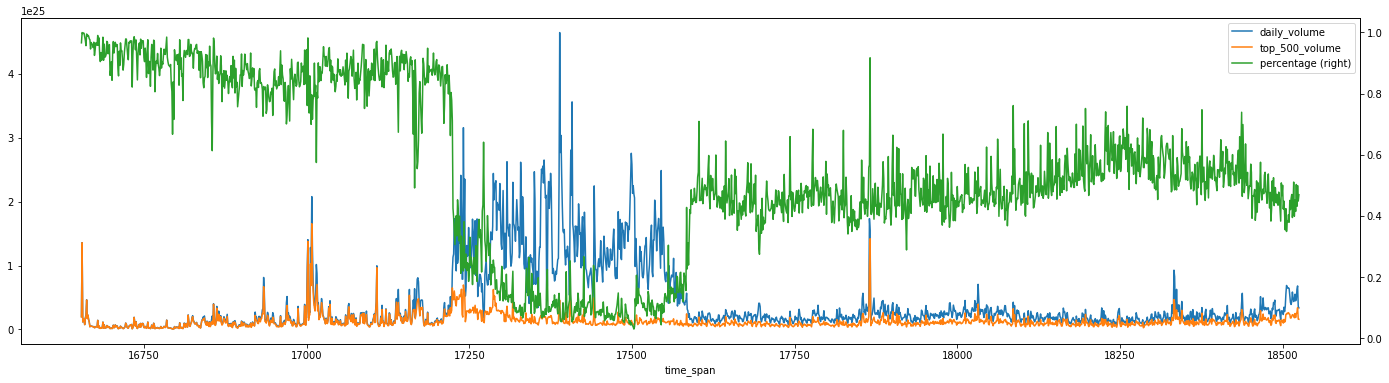

In [53]:
# load the top 500 transactions by day and aggregate stats of all transactions
top_transactions_daily = TopTransactionsData('data/transactions/top_daily', TimeSpan.DAY)
transactions_stats_daily = TransactionsStatsData('data/transactions/stats_daily', TimeSpan.DAY)

# aggregate the top 500 volume
top_agg = top_transactions_daily.transactions_agg[[['value', 'sum']]]
top_agg.columns = top_agg.columns.map('_'.join)
top_agg = top_agg.rename(columns={'value_sum': 'top_500_volume'})

# look at the volume from the top 500 transactions compared to daily totals
daily_agg = transactions_stats_daily.stats[['time_span', 'sum_value']].sort_values(by=['time_span'])
daily_agg = daily_agg.rename(columns={'sum_value': 'daily_volume'})

merged_daily = pandas.merge(daily_agg, top_agg, how='left', on='time_span')
merged_daily['percentage'] = merged_daily['top_500_volume'] / merged_daily['daily_volume']
merged_daily.plot(x='time_span', y=['daily_volume', 'top_500_volume', 'percentage'], figsize=(24, 6), secondary_y=['percentage'])

<AxesSubplot:xlabel='time_span'>

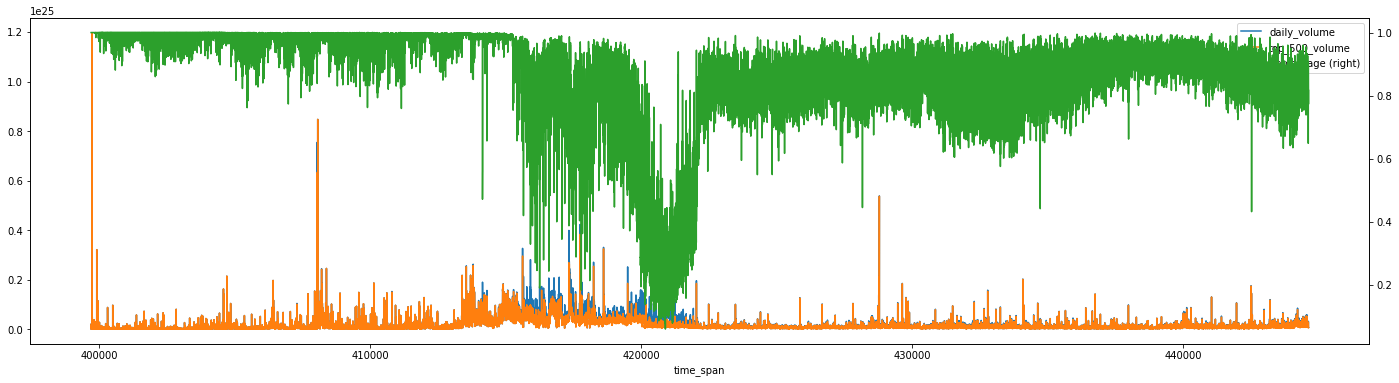

In [55]:
# load the top 500 transactions by day and aggregate stats of all transactions
top_transactions_hourly = TopTransactionsData('data/transactions/top_hourly', TimeSpan.HOUR)
transactions_stats_hourly = TransactionsStatsData('data/transactions/stats_hourly', TimeSpan.HOUR)

# aggregate the top 500 volume
top_agg = top_transactions_hourly.transactions_agg[[['value', 'sum']]]
top_agg.columns = top_agg.columns.map('_'.join)
top_agg = top_agg.rename(columns={'value_sum': 'top_500_volume'})

# look at the volume from the top 500 transactions compared to daily totals
daily_agg = transactions_stats_hourly.stats[['time_span', 'sum_value']].sort_values(by=['time_span'])
daily_agg = daily_agg.rename(columns={'sum_value': 'daily_volume'})

merged_hourly = pandas.merge(daily_agg, top_agg, how='left', on='time_span')
merged_hourly['percentage'] = merged_hourly['top_500_volume'] / merged_hourly['daily_volume']
merged_hourly.plot(x='time_span', y=['daily_volume', 'top_500_volume', 'percentage'], figsize=(24, 6), secondary_y=['percentage'])